# Problem (4.15)

## Problem statement

A hydrogen atom starts out in the follwing linear combination of the stationary states $n=2$, $l=1$, $m=1$ and $n=2$, $l=1$, $m=-1$

$$ \Psi(\textbf{r}, 0) = \frac{1}{\sqrt2} (\psi_{211} + \psi_{21-1}) $$

1. Construct $\Psi(\textbf{r}, t)$
2. Find the expectation value of the potential energy. Give both the formula and the actual number in electron volts.

----

## Solution

In [1]:
import sympy as sp
sp.init_printing()

r = sp.symbols('r', real=True)
theta, phi = sp.symbols('theta phi', real=True)
a = sp.symbols('a', real=True, positive=True)

def psi(n, l, m):  #see equation 4.89
    
    r, a = sp.symbols('r a', real=True)
    x = sp.symbols('x')
    
    p = 2*l + 1
    q = (n - l -1) + p
    
    Lq = sp.exp(x)*sp.diff(sp.exp(-x)*(x**q), x, q) #laguerre polynomial
    vrho = (-1)**p*sp.diff(Lq, x, p)                #v(rho)
    vrho = sp.simplify(vrho.subs(x, 2*r/(a*n)))
    
    theta, phi = sp.symbols('theta phi', real=True)
    x = sp.cos(theta)
    Pl = (1/((2**l)*sp.factorial(l)))*sp.diff((x**2-1)**l, x, l)         #Legendre Polynomial
    Plm = (1-x**2)**(sp.Abs(m)/2)*sp.diff(Pl, x, sp.Abs(m))              #associated Legendre Polynomial  
    
    #turn legendre into normalized angular solution
    if m < 0:
        Ylm = sp.sqrt(((2*l+1)/(4*sp.pi))*(sp.factorial(l- sp.Abs(m)))/(sp.factorial(l + sp.Abs(m))))*sp.exp(sp.I*m*phi)*Plm
    else:
        Ylm = (-1)**m*sp.sqrt(((2*l+1)/(4*sp.pi))*(sp.factorial(l- sp.Abs(m)))/(sp.factorial(l + sp.Abs(m))))*sp.exp(sp.I*m*phi)*Plm
    
    #combine v(rho), angular solution and radial solution to build psi
    
    term1 = sp.sqrt((2/(n*a))**3*sp.factorial(n - l - 1)/(2*n*(sp.factorial(n+l)**3)))*sp.exp(-r/(n*a))
    term2 = (2*r/(n*a))**l*vrho*Ylm
    psi = sp.simplify(term1*term2)
    
    return sp.simplify(psi)

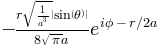

In [2]:
psi(2,1,1)

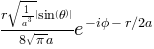

In [3]:
psi(2, 1, -1)

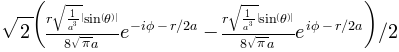

In [4]:
psi_0 = (1/sp.sqrt(2))*(psi(2,1,1)+psi(2,1,-1))
psi_0

The energies of the Hydrogen atom only depend on the principle quantum number, $n$.

$$ E_n = E_1/n^2 $$

so we just need to multiply our two states by a single exponential, $e^{-iE_2t/\hbar}$

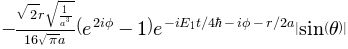

In [5]:
E_1, t= sp.symbols('E_1 t', real=True)
n = 2
E = E_1/n**2

from sympy.physics.quantum.constants import hbar
Psi_rt = sp.simplify(psi_0*sp.exp(-sp.I*E*t/hbar))
Psi_rt

Now we need to calculate $\langle V \rangle$ where $V = -\frac{e^2}{4\pi\epsilon_0r} $

In [30]:
e, epsilon = sp.symbols('e epsilon_0', real=True, constant=True)
V = -e**2/(4*sp.pi*epsilon*r)

In [44]:
integrand = V*sp.conjugate(Psi_rt)*Psi_rt*r**2*sp.sin(theta)
expecV = sp.integrate(integrand, (r, 0, sp.oo))
expecV = sp.integrate(expecV, (theta, 0, sp.pi))
expecV = sp.integrate(expecV, (phi, 0, 2*sp.pi))
expecV

RecursionError: maximum recursion depth exceeded

----

## Portfolio references
* 
## Index terms
* Hydrogen Atom

## Book references
*
## External references